In [1]:
import pandas as pd
import numpy as np

dataset=pd.read_excel("Book1.xlsx")

In [2]:
X = dataset.iloc[:,2:7]
y=dataset.iloc[:,-1]

In [3]:
X.head()

,OCCURANCE,SEVERITY,DETECTION,ITEM TYPE,ACTION
0,MP,P,VH,1,0
1,MP,P,H,2,0
2,MH,H,H,1,1
3,VH,P,VH,1,2
4,H,M,P,1,1


In [4]:
#fuzzification of the data .
import statistics
VP=[0.0,0.0,0.1,0.2]
vp=statistics.mean(VP)
print(vp)
X['OCCURANCE'] = X['OCCURANCE'].replace(['VP'],'0.075')

0.07500000000000001


In [5]:
P=[0.1,0.2,0.2,0.3]
p=statistics.mean(P)
print(p)
X['OCCURANCE'] = X['OCCURANCE'].replace(['P'],'0.2')

0.2


In [6]:
MP=[0.2,0.3,0.4,0.5]
mp=statistics.mean(MP)
print(mp)
X['OCCURANCE'] = X['OCCURANCE'].replace(['MP'],'0.35')

0.35


In [7]:
M=[0.4,0.5,0.5,0.6]
m=statistics.mean(M)
print(m)
X['OCCURANCE'] = X['OCCURANCE'].replace(['M'],'0.5')

0.5


In [8]:
MH=[0.5,0.6,0.7,0.8]
mh=statistics.mean(MH)
print(mh)
X['OCCURANCE'] = X['OCCURANCE'].replace(['MH'],'0.65')

0.65


In [9]:
H=[0.7,0.8,0.8,0.9]
h=statistics.mean(H)
print(h)
X['OCCURANCE'] = X['OCCURANCE'].replace(['H'],'0.8')

0.8


In [10]:
VH=[0.8,0.9,1.0,1.0]
vh=statistics.mean(VH)
print(vh)
X['OCCURANCE'] = X['OCCURANCE'].replace(['VH'],'0.925')

0.925


In [11]:
X.head()

,OCCURANCE,SEVERITY,DETECTION,ITEM TYPE,ACTION
0,0.35,P,VH,1,0
1,0.35,P,H,2,0
2,0.65,H,H,1,1
3,0.925,P,VH,1,2
4,0.8,M,P,1,1


In [12]:
#converting fuzzy values to numerical number.
X['SEVERITY'] = X['SEVERITY'].replace(['VP'],'0.075')
X['SEVERITY'] = X['SEVERITY'].replace(['P'],'0.2')
X['SEVERITY'] = X['SEVERITY'].replace(['MP'],'0.35')
X['SEVERITY'] = X['SEVERITY'].replace(['M'],'0.5')
X['SEVERITY'] = X['SEVERITY'].replace(['MH'],'0.65')
X['SEVERITY'] = X['SEVERITY'].replace(['H'],'0.8')
X['SEVERITY'] = X['SEVERITY'].replace(['VH'],'0.925')
X.head()

,OCCURANCE,SEVERITY,DETECTION,ITEM TYPE,ACTION
0,0.35,0.2,VH,1,0
1,0.35,0.2,H,2,0
2,0.65,0.8,H,1,1
3,0.925,0.2,VH,1,2
4,0.8,0.5,P,1,1


In [13]:
X['DETECTION'] = X['DETECTION'].replace(['VP'],'0.075')
X['DETECTION'] = X['DETECTION'].replace(['P'],'0.2')
X['DETECTION'] = X['DETECTION'].replace(['MP'],'0.35')
X['DETECTION'] = X['DETECTION'].replace(['M'],'0.5')
X['DETECTION'] = X['DETECTION'].replace(['MH'],'0.65')
X['DETECTION'] = X['DETECTION'].replace(['H'],'0.8')
X['DETECTION'] = X['DETECTION'].replace(['VH'],'0.925')
X.head()

,OCCURANCE,SEVERITY,DETECTION,ITEM TYPE,ACTION
0,0.35,0.2,0.925,1,0
1,0.35,0.2,0.8,2,0
2,0.65,0.8,0.8,1,1
3,0.925,0.2,0.925,1,2
4,0.8,0.5,0.2,1,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=1)

In [15]:
X_test.shape

(40, 5)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#testing accuracy
y_pred = dt.predict(X_test)
print("model score: %.3f" % dt.score(X_test, y_test))

model score: 0.775


In [18]:
#training accuracy
y_pred = dt.predict(X_train)
print("model score: %.3f" % dt.score(X_train, y_train))

model score: 0.949


In [19]:
def accuracy(X , Y ,clf):
  result = clf.predict(X)
  return sum(Y==result)/len(result)


                       For max_depth : 3
min_samples_leaf      Training Accuracy     Test Accuracy
     1                     0.77                 0.80
     2                     0.77                 0.80
     3                     0.76                 0.80
     4                     0.76                 0.80
     5                     0.76                 0.80

                       For max_depth : 4
min_samples_leaf      Training Accuracy     Test Accuracy
     1                     0.81                 0.80
     2                     0.81                 0.80
     3                     0.81                 0.85
     4                     0.81                 0.85
     5                     0.80                 0.85

                       For max_depth : 5
min_samples_leaf      Training Accuracy     Test Accuracy
     1                     0.86                 0.88
     2                     0.85                 0.88
     3                     0.86                 0.88
     4     

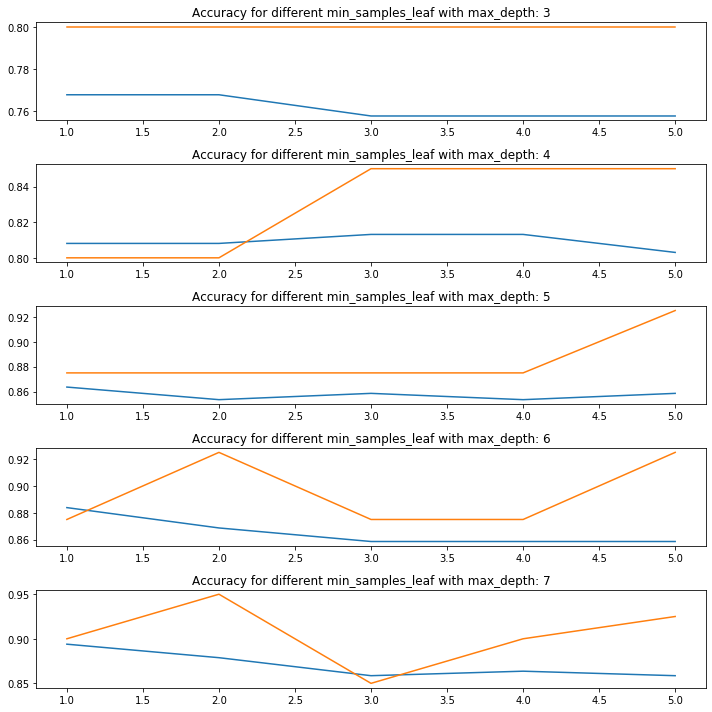

In [20]:
#improving accuracy by altering depth and sample leaf in the decision  tree 
from matplotlib import pyplot as plt
from sklearn import tree

max_depth_range = [3,4,5,6,7]
min_samples_leaf = [1,2,3,4,5]
Accuracy_train=[]
Accuracy_test=[]
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize=(10, 10))
k = 0
for depth in max_depth_range:
    acc_train = []
    acc_test = []
    print("\n                       For max_depth : "+str(depth))
    print("min_samples_leaf      Training Accuracy     Test Accuracy")
    for s in min_samples_leaf:
        clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth,min_samples_leaf=s,random_state=4)
        clf.fit(X,y)
        acc_train.append(accuracy(X,y,clf))
        acc_test.append(accuracy(X_test,y_test,clf))
        print("     "+str(s)+"                     "+"{:.2f}".format(accuracy(X,y,clf))+"                 "+"{:.2f}".format(accuracy(X_test,y_test,clf)))
    ax[k].plot(min_samples_leaf,acc_train)
    ax[k].plot(min_samples_leaf,acc_test)
    ax[k].title.set_text('Accuracy for different min_samples_leaf with max_depth: %s'%(depth))
    k += 1
    Accuracy_train.append(np.array(acc_train))
    Accuracy_test.append(np.array(acc_test))
fig.tight_layout()
plt.show()


In [21]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[16,  5],
       [ 4, 15]], dtype=int64)

In [22]:
#confusion matrix for train data
from sklearn.metrics import roc_curve, roc_auc_score
y_pred=dt.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[65,  2],
       [ 6, 85]], dtype=int64)

In [23]:
#finding fp's,tp's
y_score1 = dt.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

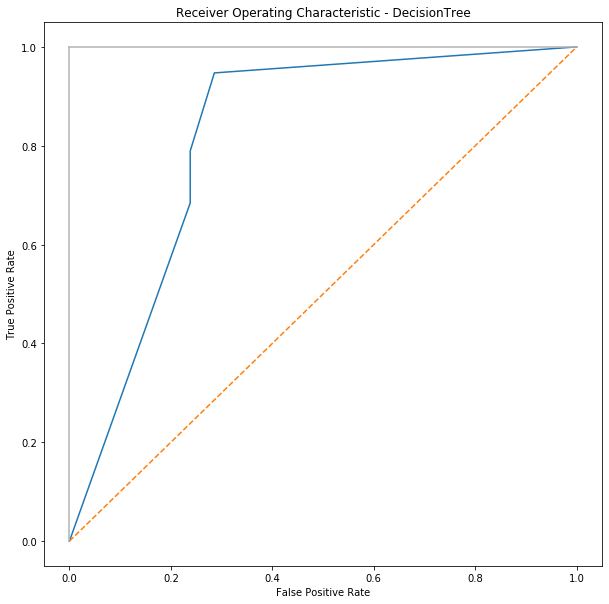

In [24]:
#printing roc curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
#fitting logistic regreesion model.
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#testing accuracy
y_pred = logisticRegr.predict(X_test)
print("model score: %.3f" % logisticRegr.score(X_test, y_test))

model score: 0.650


In [27]:
#training accuracy
y_pred = logisticRegr.predict(X_train)
print("model score: %.3f" % logisticRegr.score(X_train, y_train))

model score: 0.696


In [28]:
#confusion matrix for test data
y_pred=logisticRegr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 8, 13],
       [ 1, 18]], dtype=int64)

In [29]:
#confusion matrix for train data
y_pred=logisticRegr.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[33, 34],
       [14, 77]], dtype=int64)

In [30]:
y_score1 = logisticRegr.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

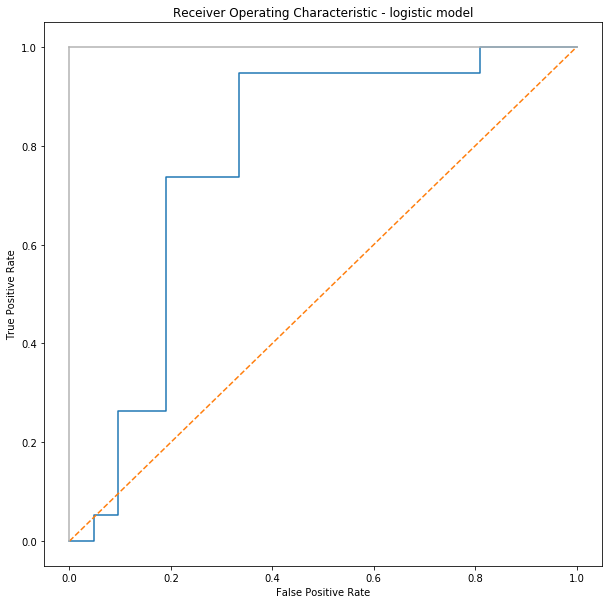

In [31]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - logistic model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
#fitting support vector classifier
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
#training accuracy
print("model score: %.3f" % svclassifier.score(X_train, y_train))

model score: 0.785


In [34]:
print("model score: %.3f" % svclassifier.score(X_test, y_test))

model score: 0.725


In [35]:
y_pred=svclassifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[15,  6],
       [ 5, 14]], dtype=int64)

In [36]:
y_pred=svclassifier.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[52, 15],
       [19, 72]], dtype=int64)

ValueError: X has 7 features per sample; expecting 5

In [37]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=5, random_state=4)
cart = DecisionTreeClassifier()
num_trees = 10
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=4)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7473790322580646


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [38]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=5, random_state=None,shuffle=True)

In [39]:
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

In [40]:
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

In [41]:
model3 = SVC(probability=True)
estimators.append(('svm', model3))

In [42]:
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.7467741935483871


In [43]:
ensemble.fit(X_train,y_train)
print("model score: %.3f" % ensemble.score(X_train, y_train))

model score: 0.930


In [44]:
print("model score: %.3f" % ensemble.score(X_test, y_test))

model score: 0.825


In [45]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix

y_pred=ensemble.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[15,  6],
       [ 1, 18]], dtype=int64)

In [46]:
y_pred=ensemble.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[61,  6],
       [ 5, 86]], dtype=int64)

In [47]:
y_score1 = ensemble.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

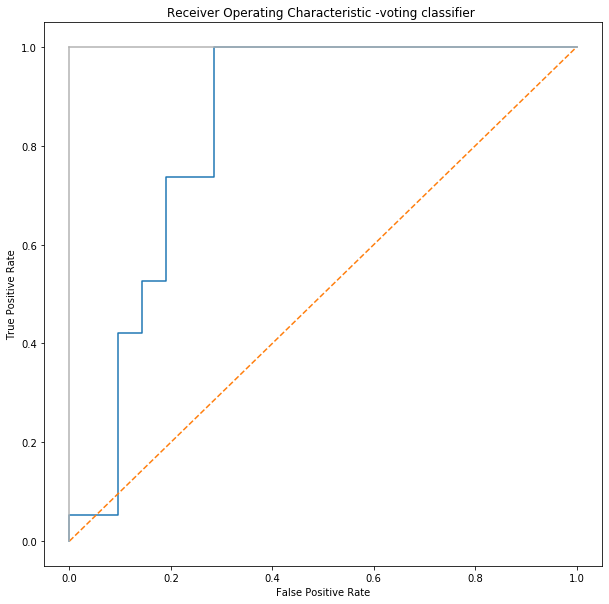

In [48]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic -voting classifier ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

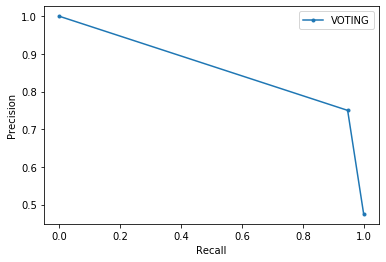

In [51]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
y_pred=ensemble.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pyplot.plot(recall, precision, marker='.', label='VOTING')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

pyplot.show()

In [53]:
from numpy import argmax
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print( 'F-Score=%.3f' % ( fscore[ix]))

F-Score=0.837


In [54]:
print(y_score1)

[0.7178542  0.53765214 0.84336428 0.7928595  0.91253952 0.29980974
 0.468461   0.37240308 0.78935016 0.8327447  0.90215069 0.26964138
 0.18819963 0.80084259 0.79848522 0.58648467 0.76433081 0.18819963
 0.53765214 0.18819963 0.84675061 0.68099681 0.53407107 0.25625869
 0.40372003 0.844504   0.25714418 0.18819963 0.86929466 0.82470787
 0.33311441 0.36616909 0.76433081 0.83508111 0.35869154 0.84675061
 0.28731046 0.75605584 0.56066789 0.27296714]


In [55]:
X_test["failure"]=""
X_test["failure"]= y_test

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
X_test["probabilities"]=""
X_test["probabilities"]=y_score1

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
print (X_test)

    OCCURANCE SEVERITY DETECTION  ITEM TYPE  ACTION  failure  probabilities
175       0.8     0.35       0.8          2       1        1       0.717854
40        0.8      0.5      0.35          2       1        1       0.537652
34        0.8      0.2      0.35          1       0        1       0.843364
90      0.925      0.8     0.925          2       1        1       0.792860
145     0.925      0.8      0.35          1       0        1       0.912540
182      0.65      0.5       0.2          2       1        0       0.299810
95      0.925    0.925      0.65          2       1        1       0.468461
4         0.8      0.5       0.2          1       1        0       0.372403
29      0.925      0.8       0.5          2       1        0       0.789350
167       0.8    0.925     0.925          0       1        1       0.832745
53      0.925      0.2       0.8          1       0        0       0.902151
18        0.5      0.2       0.8          1       2        0       0.269641
11        0.